# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

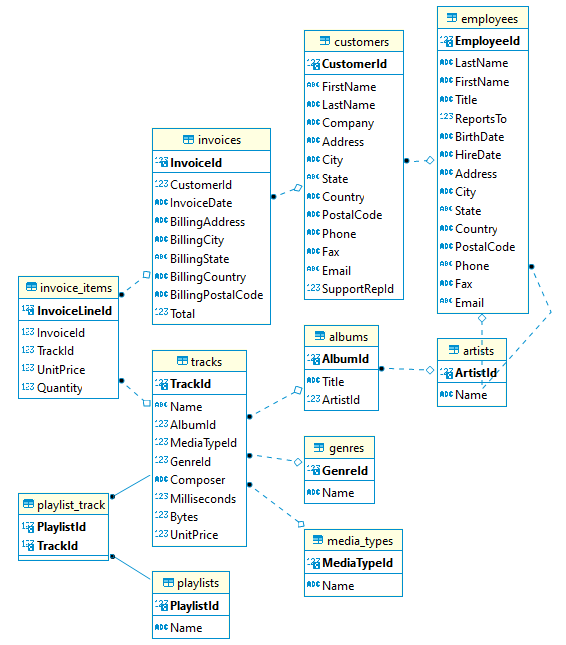

In [2]:
from IPython.display import Image
Image("C:/Users/levog/OneDrive/Images/Saved Pictures/diagrammeER.png")

La base de données est constituée de 11 tables qui permettent, grâce aux différentes relations entre elles, d'avoir accès à de nombreuses informations détaillées, telles que les clients et leurs employés référents ou leurs achats ou encore les albums et les playlists et le détail des tracks qu'ils contiennent.

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [6]:
import os
import sqlite3
import pandas as pd   

In [7]:
from pathlib import Path

In [8]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [5]:
# requête de départ
query1 = '''
    SELECT e.EmployeeId AS 'Id', e.firstname || ' ' || e.lastname AS 'Employee', e.Title AS "Titre Employé", m.firstname || ' ' || m.lastname AS 'Manager', m.Title AS "Titre Manager"
    FROM employees e
    LEFT JOIN employees m ON e.ReportsTo = m.employeeId
'''

In [6]:
results1 = pd.read_sql_query(query1, conn)
results1

,Id,Employee,Titre Employé,Manager,Titre Manager
0,1,Andrew Adams,General Manager,None,None
1,2,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
2,3,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
3,4,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,5,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager
5,6,Michael Mitchell,IT Manager,Andrew Adams,General Manager
6,7,Robert King,IT Staff,Michael Mitchell,IT Manager
7,8,Laura Callahan,IT Staff,Michael Mitchell,IT Manager


Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [7]:
query2 = """
    SELECT Name AS "Nom de l'artiste", count(*) AS "Nb d'albums"
    FROM artists
    LEFT JOIN albums ON artists.ArtistId = albums.ArtistId
    GROUP BY Name
    ORDER BY Name
"""

In [8]:
results2 = pd.read_sql_query(query2, conn)
results2

,Nom de l'artiste,Nb d'albums
0,A Cor Do Som,1
1,AC/DC,2
2,Aaron Copland & London Symphony Orchestra,1
3,Aaron Goldberg,1
4,Academy of St. Martin in the Fields & Sir Nevi...,1
...,...,...
270,Xis,1
271,Yehudi Menuhin,1
272,Yo-Yo Ma,1
273,Youssou N'Dour,1


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [65]:
query3 = """
    SELECT Title AS "Titre de l'album", artists.Name AS "Nom de l'artiste", SUM(UnitPrice) AS "Coût total", SUM(Milliseconds/1000/60) AS "Durée (min)", count(*) AS "Nb pistes"
    FROM albums
    INNER JOIN artists ON albums.ArtistId = artists.ArtistId
    LEFT JOIN tracks ON albums.AlbumId = tracks.AlbumId
    GROUP BY Title
    ORDER BY "Nom de l'artiste"
    ORDER BY "Titre de l'album"
"""

In [64]:
results3 = pd.read_sql_query(query3, conn)
results3

,Titre de l'album,Nom de l'artiste,Coût total,Durée (min),Nb pistes
0,For Those About To Rock We Salute You,AC/DC,9.90,35,10
1,Let There Be Rock,AC/DC,7.92,38,8
2,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra,0.99,3,1
3,Worlds,Aaron Goldberg,0.99,4,1
4,The World of Classical Favourites,Academy of St. Martin in the Fields & Sir Nevi...,1.98,7,2
...,...,...,...,...,...
342,Vinicius De Moraes,Vinícius De Moraes,14.85,46,15
343,Bach: Goldberg Variations,Wilhelm Kempff,0.99,2,1
344,Bartok: Violin & Viola Concertos,Yehudi Menuhin,0.99,4,1
345,Bach: The Cello Suites,Yo-Yo Ma,0.99,2,1


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


In [57]:
query4 = """
    SELECT playlists.playlistId, playlists.Name, COALESCE(SUM(UnitPrice),0) AS "Coût total", COALESCE((SUM(Milliseconds)/60000),0) AS "Durée (min)", count(tracks.TrackId) AS "Nb pistes"
    FROM playlists
    LEFT JOIN playlist_track ON playlists.PlaylistId = playlist_track.PlaylistId 
    LEFT JOIN tracks ON playlist_track.TrackId = tracks.TrackId
    GROUP BY playlists.PlaylistId
    ORDER BY playlists.Name
"""

In [58]:
results4 = pd.read_sql_query(query4, conn)
results4

,PlaylistId,Name,Coût total,Durée (min),Nb pistes
0,5,90’s Music,1462.23,6645,1477
1,4,Audiobooks,0.00,0,0
2,6,Audiobooks,0.00,0,0
3,11,Brazilian Music,38.61,158,39
4,12,Classical,74.25,362,75
5,13,Classical 101 - Deep Cuts,24.75,112,25
6,14,Classical 101 - Next Steps,24.75,126,25
7,15,Classical 101 - The Basics,24.75,123,25
8,16,Grunge,14.85,68,15
9,17,Heavy Metal Classic,25.74,136,26


Q05. Produire une liste des tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


In [61]:
query5 = """
SELECT genres.Name AS Genre, count(tracks.TrackId) AS "Nombre pistes", (SUM(Milliseconds)/60000) AS "Durée (en min)", SUM(UnitPrice) AS "Coût total", AVG(UnitPrice) AS "Coût moyen"
FROM genres
LEFT JOIN tracks ON genres.GenreId = tracks.genreId
GROUP BY genres.GenreId
"""

In [62]:
results5 = pd.read_sql_query(query5, conn)
results5

,Genre,Nombre pistes,Durée (en min),Coût total,Coût moyen
0,Rock,1297,6137,1284.03,0.99
1,Jazz,130,632,128.70,0.99
2,Metal,374,1930,370.26,0.99
3,Alternative & Punk,332,1296,328.68,0.99
4,Rock And Roll,12,26,11.88,0.99
5,Blues,81,364,80.19,0.99
6,Latin,579,2247,573.21,0.99
7,Reggae,58,238,57.42,0.99
8,Pop,48,183,47.52,0.99
9,Soundtrack,43,175,42.57,0.99


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


In [37]:
query6 = """
    SELECT tracks.Name AS "Nom track", albums.Title AS "Titre album", artists.Name AS "Artiste de l'album", tracks.Composer AS "Compositeur", media_types.Name AS "Type média", SUM(Milliseconds/1000) AS "Durée", UnitPrice AS "Prix unitaire"
    FROM tracks
    INNER JOIN albums ON tracks.AlbumId = albums.AlbumId 
    INNER JOIN artists ON albums.ArtistId = artists.ArtistId
    INNER JOIN media_types ON tracks.MediaTypeId = media_types.MediaTypeId 
    INNER JOIN genres ON tracks.GenreId = genres.GenreId
    WHERE genres.Name = "Science Fiction"
    GROUP BY tracks.TrackId
"""

In [38]:
results6 = pd.read_sql_query(query6, conn)
results6

,Nom track,Titre album,Artiste de l'album,Compositeur,Type média,Durée,Prix unitaire
0,Battlestar Galactica: The Story So Far,Battlestar Galactica: The Story So Far,Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
1,A Measure of Salvation,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2563,1.99
2,Hero,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2713,1.99
3,Unfinished Business,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
4,The Passage,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2623,1.99
5,The Eye of Jupiter,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2618,1.99
6,Rapture,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
7,Taking a Break from All Your Worries,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
8,The Woman King,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2626,1.99
9,A Day In the Life,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2620,1.99


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [41]:
query7 = """
    SELECT customers.Firstname, customers.Lastname, customers.Email, customers.Country
    FROM customers
    INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId 
    INNER JOIN invoice_items ON invoices.invoiceId = invoice_items.InvoiceId 
    INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
    INNER JOIN genres ON tracks.GenreId = genres.GenreId 
    WHERE genres.Name = "World"
    GROUP BY customers.CustomerId
"""

In [42]:
results7 = pd.read_sql_query(query7, conn)
results7

,FirstName,LastName,Email,Country
0,Bjørn,Hansen,bjorn.hansen@yahoo.no,Norway
1,Roberto,Almeida,roberto.almeida@riotur.gov.br,Brazil
2,Mark,Philips,mphilips12@shaw.ca,Canada
3,Jennifer,Peterson,jenniferp@rogers.ca,Canada
4,Martha,Silk,marthasilk@gmail.com,Canada
5,Aaron,Mitchell,aaronmitchell@yahoo.ca,Canada
6,João,Fernandes,jfernandes@yahoo.pt,Portugal
7,Joakim,Johansson,joakim.johansson@yahoo.se,Sweden
8,Steve,Murray,steve.murray@yahoo.uk,United Kingdom


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [70]:
query8 = """
    SELECT artists.Name AS "Artiste", count(*) AS "Nb pistes rock"
    FROM artists
    INNER JOIN albums ON artists.ArtistId = albums.ArtistId 
    INNER JOIN tracks ON albums.AlbumId = tracks.AlbumId 
    INNER JOIN genres ON tracks.GenreId = genres.genreId
    WHERE genres.Name = "Rock"
    GROUP BY artists.ArtistId
    ORDER BY count(*) DESC
    LIMIT 15
"""

In [71]:
results8 = pd.read_sql_query(query8, conn)
results8

,Artiste,Nb pistes rock
0,Led Zeppelin,114
1,U2,112
2,Deep Purple,92
3,Iron Maiden,81
4,Pearl Jam,54
5,Van Halen,52
6,Queen,45
7,The Rolling Stones,41
8,Creedence Clearwater Revival,40
9,Kiss,35


Q09. Nommez les 5 meilleurs clients 

In [47]:
query9 = """
    SELECT customers.CustomerId AS Id, customers.Firstname AS Prénom, customers.Lastname AS Nom, SUM(invoices.Total) AS Dépense
    FROM customers
    INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId 
    GROUP BY customers.CustomerId
    ORDER BY SUM(invoices.Total) DESC
    LIMIT 5
"""

In [48]:
results9 = pd.read_sql_query(query9, conn)
results9

,Id,Prénom,Nom,Dépense
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


In [68]:
query10 = """
    SELECT tracks.Name AS "Track", albums.Title AS "Album", artists.Name AS "Artiste", genres.Name AS "Genre", media_types.Name AS "Type média"
    FROM tracks
    INNER JOIN invoice_items ON tracks.TrackId = invoice_items.TrackId 
    INNER JOIN invoices ON invoice_items.InvoiceId = invoices.InvoiceId 
    INNER JOIN customers ON invoices.CustomerId = customers.CustomerId 
    INNER JOIN albums ON tracks.AlbumId = albums.AlbumId 
    INNER JOIN artists ON albums.ArtistId = artists.ArtistId
    INNER JOIN genres ON tracks.GenreId = genres.GenreId 
    INNER JOIN media_types ON tracks.MediaTypeId = media_types.MediaTypeId 
    WHERE customers.LastName = "Cunningham" AND customers.FirstName = "Richard"
    ORDER BY invoices.InvoiceDate
"""

In [69]:
results10 = pd.read_sql_query(query10, conn)
results10

,Track,Album,Artiste,Genre,Type média
0,Radio Free Aurope,The Best Of R.E.M.: The IRS Years,R.E.M.,Alternative & Punk,MPEG audio file
1,Perfect Circle,The Best Of R.E.M.: The IRS Years,R.E.M.,Alternative & Punk,MPEG audio file
2,Drowning Man,War,U2,Rock,MPEG audio file
3,Two Hearts Beat As One,War,U2,Rock,MPEG audio file
4,Surrender,War,U2,Rock,MPEG audio file
5,Zooropa,Zooropa,U2,Rock,MPEG audio file
6,Sozinho (Caêdrum 'n' Bass),Sozinho Remix Ao Vivo,Caetano Veloso,Latin,MPEG audio file
7,Samba De Orly,Minha Historia,Chico Buarque,Latin,MPEG audio file
8,O Que Será (À Flor Da Terra),Minha Historia,Chico Buarque,Latin,MPEG audio file
9,Minha Historia,Minha Historia,Chico Buarque,Latin,MPEG audio file


Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


In [72]:
query11 = """
    SELECT FirstName, LastName, Email, Country, Phone, "Customer" AS "Type"
    FROM customers
    UNION
    SELECT FirstName, LastName, Email, Country, Phone, "Employee" AS "Type"
    FROM employees
"""

In [73]:
results11 = pd.read_sql_query(query11, conn)
results11

,FirstName,LastName,Email,Country,Phone,Type
0,Aaron,Mitchell,aaronmitchell@yahoo.ca,Canada,+1 (204) 452-6452,Customer
1,Alexandre,Rocha,alero@uol.com.br,Brazil,+55 (11) 3055-3278,Customer
2,Andrew,Adams,andrew@chinookcorp.com,Canada,+1 (780) 428-9482,Employee
3,Astrid,Gruber,astrid.gruber@apple.at,Austria,+43 01 5134505,Customer
4,Bjørn,Hansen,bjorn.hansen@yahoo.no,Norway,+47 22 44 22 22,Customer
...,...,...,...,...,...,...
62,Steve,Murray,steve.murray@yahoo.uk,United Kingdom,+44 0131 315 3300,Customer
63,Terhi,Hämäläinen,terhi.hamalainen@apple.fi,Finland,+358 09 870 2000,Customer
64,Tim,Goyer,tgoyer@apple.com,USA,+1 (408) 996-1010,Customer
65,Victor,Stevens,vstevens@yahoo.com,USA,+1 (608) 257-0597,Customer


Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [17]:
query12 = """
    SELECT BillingCountry AS Pays, COUNT(BillingCountry) AS "Nombre de co", SUM(Total) AS Somme, ROUND(SUM(Total) / (SELECT SUM(Total) FROM invoices) * 100,2) "en %"
    FROM invoices
    GROUP BY BillingCountry
    ORDER BY Somme DESC
"""

In [18]:
results12 = pd.read_sql_query(query12, conn)
results12

,Pays,Nombre de co,Somme,en %
0,USA,91,523.06,22.46
1,Canada,56,303.96,13.05
2,France,35,195.10,8.38
3,Brazil,35,190.10,8.16
4,Germany,28,156.48,6.72
5,United Kingdom,21,112.86,4.85
6,Czech Republic,14,90.24,3.88
7,Portugal,14,77.24,3.32
8,India,13,75.26,3.23
9,Chile,7,46.62,2.00
